## Non-Linear Classification


- In many real life problems, the data is not linearly separable,but we need to classify the data. This can be done using by projecting the data to higer dimesions so that it becomes linearly separable.
<img src="img/linearly_separable.png" alt="Linear Separable" style="width: 600px;"/>




    



## Projecting data to higher dimensions!
When working with non-linear datasets, we can project orginal feature vectors into higher dimensional space where they can be linearly separated!  

## Let us see one example


Data in 2-Dimensional Space
<img src="img/circles_low.png" alt="Linear Separable" style="width: 400px;"/>

Data Projected in 3-D Dimensional Space, after processing the original data using a non-linear function.
<img src="img/circles_3d.png" alt="Linear Separable" style="width: 400px;"/>


### Code 

In [14]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [28]:
X,Y = make_circles(n_samples=500,noise=0.02)

In [29]:
print(X.shape,Y.shape)

(500, 2) (500,)


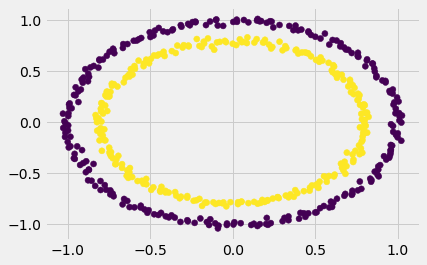

In [30]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [31]:
def phi(X):
    """"Non Linear Transformation"""
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X_[:,:-1] = X
    X_[:,-1] = X3

    return X_

In [32]:
X_ = phi(X)

(500, 3)


In [33]:
print(X[:3,:])

[[-0.72852437 -0.69838402]
 [-0.80870465  0.60898239]
 [-0.65923344 -0.75058627]]


In [34]:
print(X_[:3,:])

[[-0.72852437 -0.69838402  1.018488  ]
 [-0.80870465  0.60898239  1.02486275]
 [-0.65923344 -0.75058627  0.99796848]]


In [56]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax
    

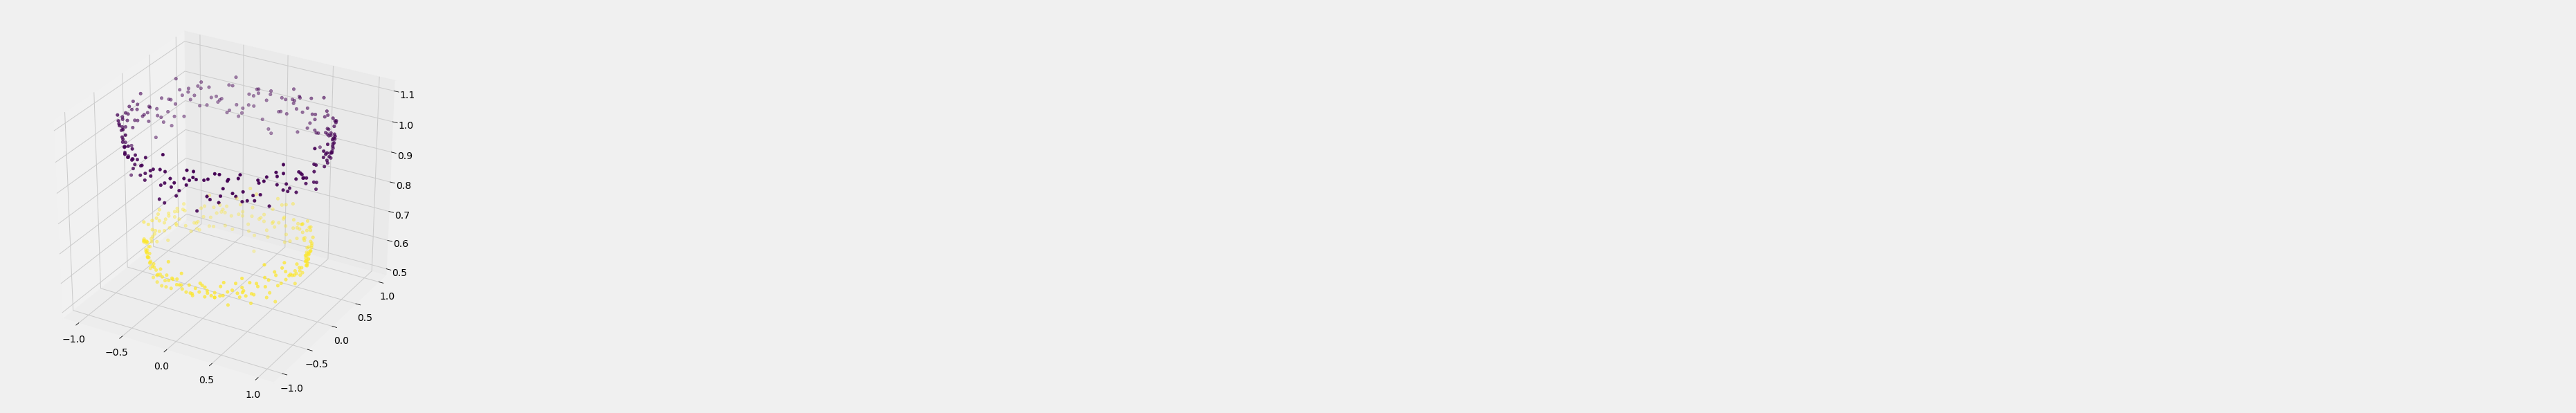

In [57]:
ax = plot3d(X_)

### Logistic Classifier

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [39]:
lr = LogisticRegression()

In [41]:
acc = cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 42.4000


### Logistic Classifier on Higher Dimension Space

In [42]:
acc = cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(3D) is %.4f"%(acc*100))

Accuracy X(3D) is 100.0000


### Visualise the Decision Surface

In [43]:
lr.fit(X_,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
wts = lr.coef_
print(wts)

[[-3.34855943e-03 -1.86448315e-02 -8.87243797e+00]]


In [49]:
bias = lr.intercept_

In [48]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [53]:
z = -(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]
print(z)


[[0.81483644 0.81445903 0.81408162 0.8137042 ]
 [0.81273501 0.81235759 0.81198018 0.81160277]
 [0.81063357 0.81025616 0.80987875 0.80950134]
 [0.80853214 0.80815473 0.80777732 0.80739991]]


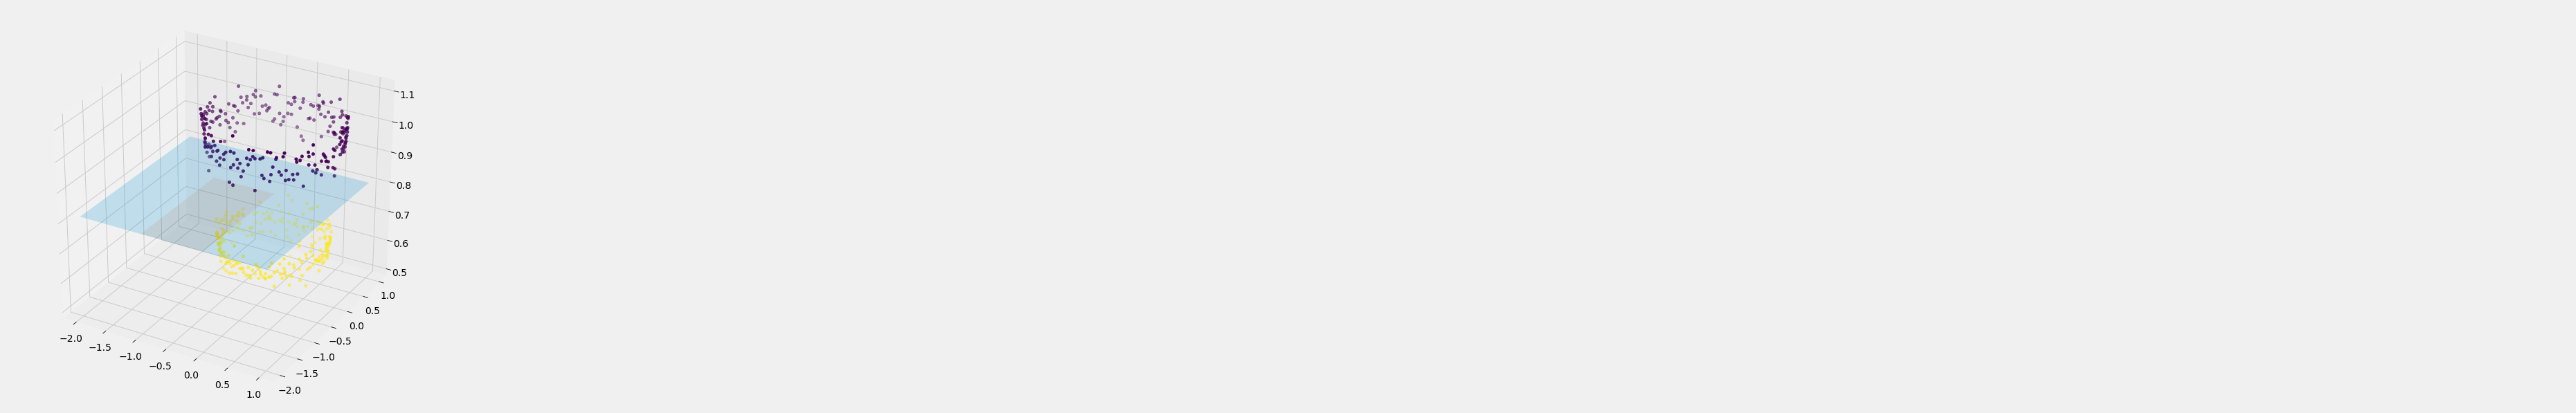

In [65]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.2)
plt.show()

## Kernel Based Classifcation in SVM's
Sklearn supports the following types of Kernels, which can be used in many-real life problems.

- Linear Kernel
- RBF Kernel
- Polynomial Kernel
- Sigmoid Kernel

**Kernel trick** is method of using a linear classifer to solve a non-linear problem. It transforms the linearly in-separable data into linearly separable one.

In [66]:
from sklearn import svm

### Linear Kernel SVM

In [74]:

svc = svm.SVC(kernel="linear")

In [75]:
svc.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
svc.score(X,Y)

0.504

### RBF Kernel SVM

In [86]:
svc = svm.SVC(kernel="rbf")
svc.fit(X,Y)
svc.score(X,Y)

1.0

## Polynomial 

In [84]:
svc = svm.SVC(kernel="poly")
svc.fit(X,Y)
svc.score(X,Y)

0.53

### Custom Kernel

In [93]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

svc = svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

1.0

## Mathematical Formulation
https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation


https://scikit-learn.org/stable/modules/svm.html
